In [70]:
import matplotlib.pyplot as plt

sigma = 0.16
r = 0.06
T = 2
K = 100
S0 = 100
mu = 0.08

#adapted from Octave's financial toolkit
from scipy.stats import norm
import numpy as np
    
def blsprice(Price, Strike, Rate, Time, Volatility):
    sigma_sqrtT = Volatility * np.sqrt (Time)

    d1 = 1 / sigma_sqrtT * (np.log(Price / Strike) + (Rate + Volatility**2 / 2) * Time)
    d2 = d1 - sigma_sqrtT

    phi1 = norm.cdf(d1)
    phi2 = norm.cdf(d2)
    disc = np.exp (-Rate * Time)
    F    = Price * np.exp ((Rate) * Time)

    Call = disc * (F * phi1 - Strike * phi2)
    Put  = disc * (Strike * (1 - phi2) + F * (phi1 - 1))
    return Call, Put

#adapted from Octave's financial toolkit
from scipy.stats import norm
import numpy as np
    
def blsdelta(Price, Strike, Rate, Time, Volatility):
    d1 = 1 / (Volatility * np.sqrt(Time)) * (np.log (Price / Strike) + (Rate + Volatility**2 / 2) * Time)

    phi = norm.cdf(d1)

    CallDelta = phi
    PutDelta = phi - 1
    return CallDelta, PutDelta

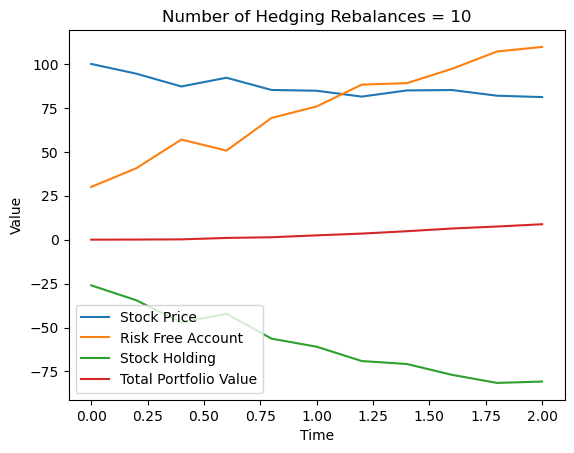

None


In [71]:
error = []
def delta_hedge(N):
    Risk_Free_Asset = []
    stockprice=[]
    alpha_list = []
    Pi_list = []
    V = []
    stockvalue = []

    Pi_list = [0]

    alpha0 = blsdelta(S0, K, r, T, sigma)[1]
    alpha_list.append(alpha0)

    S = S0
    stockprice.append(S)

    sv = alpha0*S0
    stockvalue.append(sv)

    V0 = blsprice(S0, K, r, T, sigma)[1]
    V.append(V0)

    B = V0 - alpha0*S0
    Risk_Free_Asset.append(B)
    
    
    S = stockprice[0]
    B = Risk_Free_Asset[0]
    alpha = alpha_list[0]
    dt = T/N
    for i in range(N):
        S = S*np.exp((mu - (sigma**2)/2)*dt + sigma*np.random.normal(0,1)*np.sqrt(dt))
        stockprice.append(S)
        B = B*np.exp(r*dt)
        if i < N-1:
            V_new = blsprice(S, K, r, T - (i+1)*dt, sigma)[1]
            V.append(V_new)
            Pi = -V_new + alpha*S + B
            Pi_list.append(Pi)
        else:
            V.append(max(K-S, 0))
            Pi = -max(K-S, 0) + alpha*S + B
            Pi_list.append(Pi)
        if i < N-1:
            alpha = blsdelta(S, K, r, T - (i+1)*dt, sigma)[1]
            alpha_list.append(alpha)
            Stock_Value = alpha*S
            stockvalue.append(Stock_Value)
            B = B*np.exp(r*dt) - (alpha - alpha_list[i])*S
            Risk_Free_Asset.append(B)
        else:
            alpha = alpha_list[N-1]
            alpha_list.append(alpha)
            stockvalue.append(alpha*S)
            Risk_Free_Asset.append(B*np.exp(r*dt))
    error.append(np.exp(-r*T)*Pi_list[N]/np.absolute(V0))
    Time_list = np.arange(0, T+dt, dt)
    plt.plot(Time_list, stockprice, label = "Stock Price")
    plt.plot(Time_list, Risk_Free_Asset, label = "Risk Free Account")
    plt.plot(Time_list, stockvalue, label = "Stock Holding")
    plt.plot(Time_list, Pi_list, label = "Total Portfolio Value")
    plt.legend(["Stock Price","Risk Free Account","Stock Holding","Total Portfolio Value"])
    plt.title("Number of Hedging Rebalances = " + str(N))
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()
    
print(delta_hedge(10))



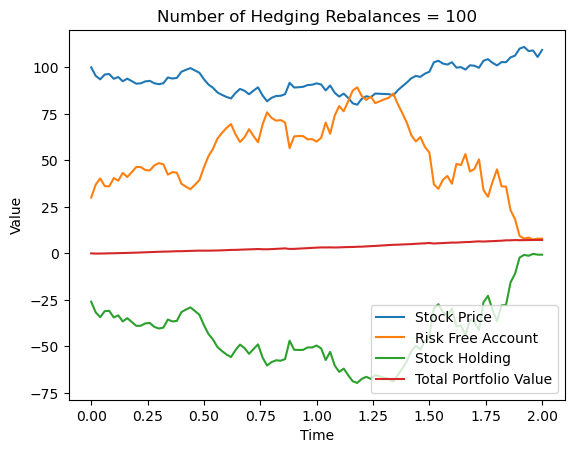

None


In [72]:
print(delta_hedge(100))

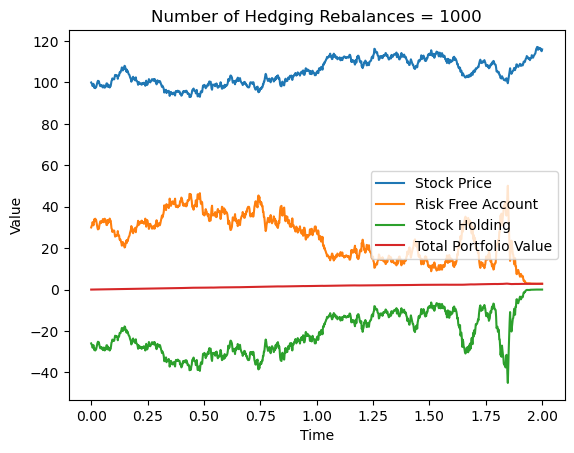

None


In [73]:
print(delta_hedge(1000))

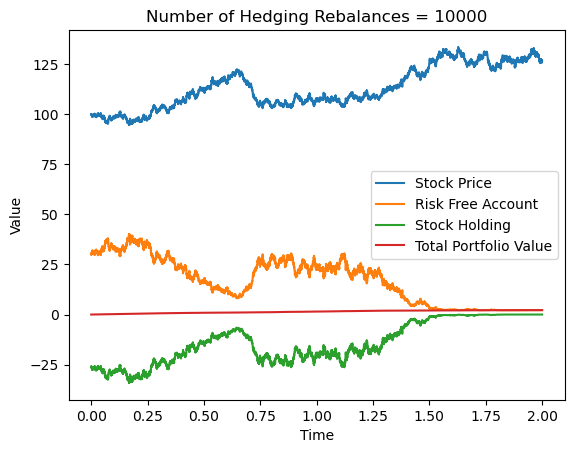

None


In [74]:
print(delta_hedge(10000))

As N increases,The total portfolio value is more stable around 0. Also, the trend of risk free account and the trend of stock holding are symmetric. These two trends converges generally as time approaches to T = 2 in these plots.

Text(0, 0.5, 'Error')

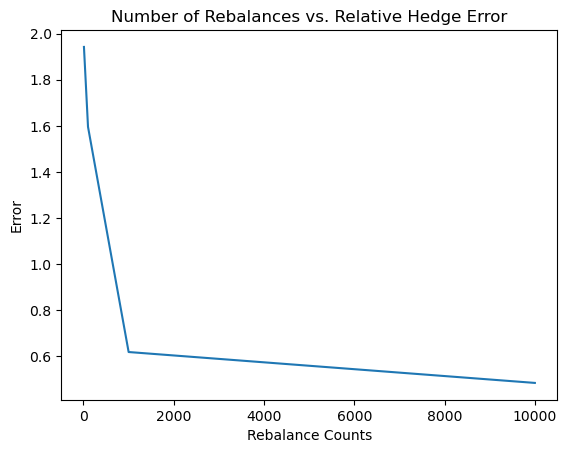

In [75]:
plt.plot(np.array([10, 100, 1000, 10000]), np.absolute(error))
plt.title("Number of Rebalances vs. Relative Hedge Error")
plt.xlabel("Rebalance Counts")
plt.ylabel("Error")

As the number of rebalances increases,the absolute value/magnitude of the relative hedge error decreases.